In [2]:
import pandas as pd
from pandas import Series,DataFrame

In [3]:
titanicdf = pd.read_csv('train.csv')

In [3]:
titanicdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanicdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
#questions:
#    1)who are the passangers?
#    2)what deck where they and the relationship between that and their class?
#    3)their origins?
#    4)who was alone and who was with family?
#    5) factors of surviving?

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

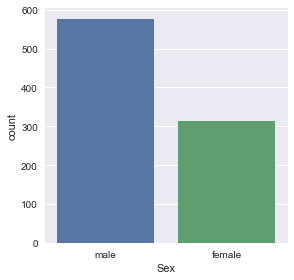

In [29]:
sb.factorplot('Sex',data=titanicdf,kind='count')

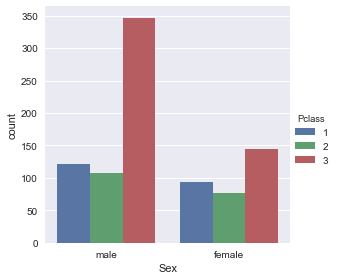

In [32]:
sb.factorplot('Sex',data=titanicdf,kind='count',hue='Pclass')

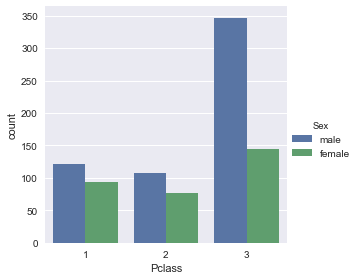

In [35]:
sb.factorplot('Pclass',data=titanicdf,kind='count',hue='Sex')

In [53]:
 def male_fem_chiled(passenger):
        age,sex = passenger
        
        
        if age < 16:
            return 'child'
        else:
            return sex

In [54]:
titanicdf['person'] = titanicdf[['Age','Sex']].apply(male_fem_chiled, axis=1)

In [39]:
titanicdf[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


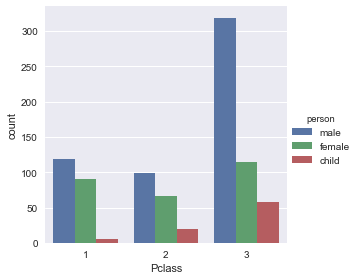

In [40]:
sb.factorplot('Pclass',data=titanicdf,kind='count',hue='person')

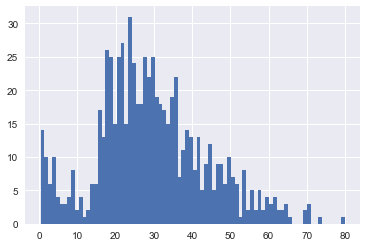

In [45]:
titanicdf['Age'].hist(bins=80)

In [46]:
titanicdf['Age'].mean()

29.69911764705882

In [47]:
titanicdf['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


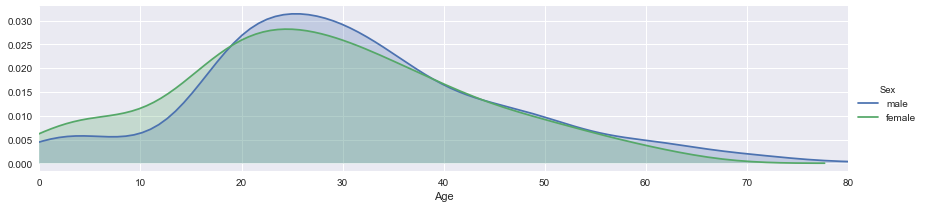

In [48]:
fig = sb.FacetGrid(titanicdf,hue='Sex',aspect=4)
fig.map(sb.kdeplot,'Age',shade=True)


oldest = titanicdf['Age'].max()


fig.set(xlim=(0,oldest))
fig.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


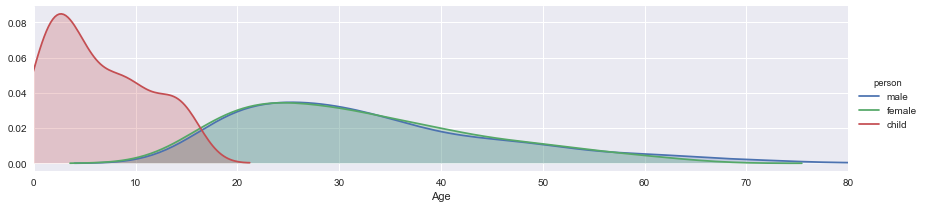

In [49]:
fig = sb.FacetGrid(titanicdf,hue='person',aspect=4)
fig.map(sb.kdeplot,'Age',shade=True)


oldest = titanicdf['Age'].max()


fig.set(xlim=(0,oldest))
fig.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


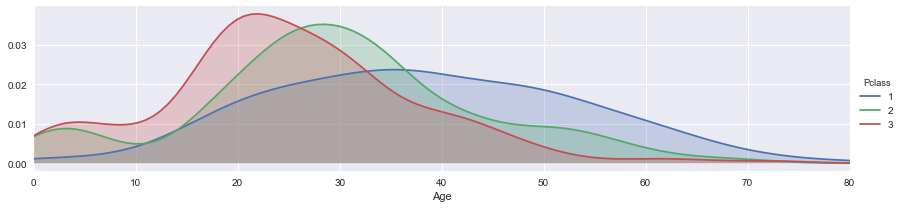

In [50]:
fig = sb.FacetGrid(titanicdf,hue='Pclass',aspect=4)
fig.map(sb.kdeplot,'Age',shade=True)


oldest = titanicdf['Age'].max()


fig.set(xlim=(0,oldest))
fig.add_legend()

In [5]:
titanicdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
deck = titanicdf['Cabin'].dropna()

In [10]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

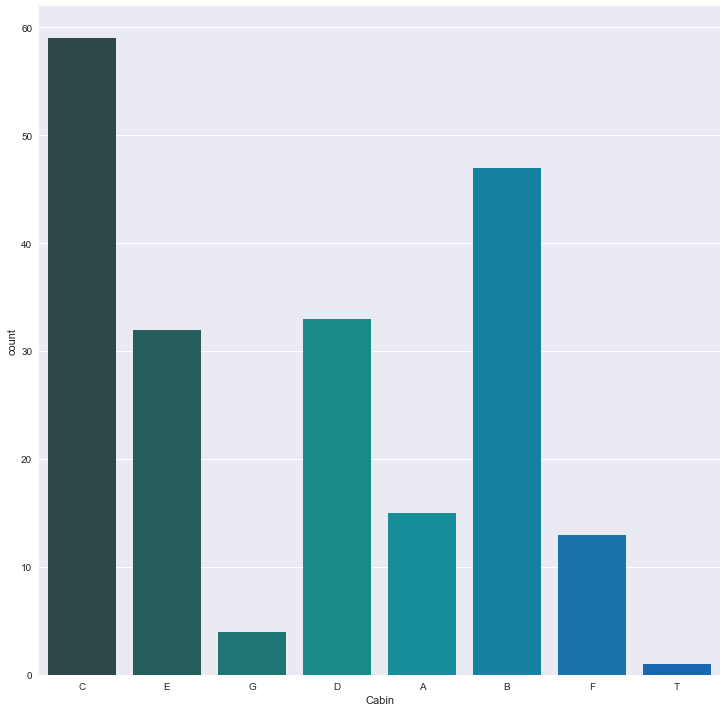

In [28]:
levls = []


for lev in deck:
    levls.append(lev[0])
    
    
cabdf = DataFrame(levls)
cabdf.columns = ['Cabin']
sb.factorplot('Cabin',data=cabdf,kind='count',palette='winter_d',size=10)

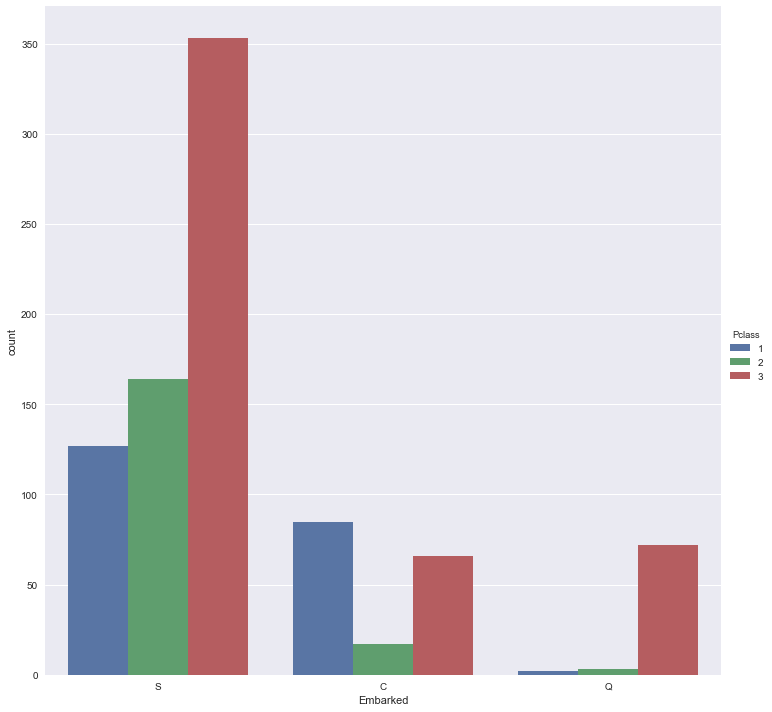

In [29]:
sb.factorplot('Embarked',data=titanicdf,kind='count',hue='Pclass',size=10)

In [30]:
#who was alone and who was not alone

In [31]:
titanicdf['Alone'] = titanicdf.SibSp + titanicdf.Parch

In [33]:
titanicdf['Alone'].head()

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

In [34]:
titanicdf['Alone'].loc[titanicdf['Alone']>0] = 'with family'
titanicdf['Alone'].loc[titanicdf['Alone']==0] = 'alone'

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [35]:
titanicdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,with family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,with family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,with family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,alone


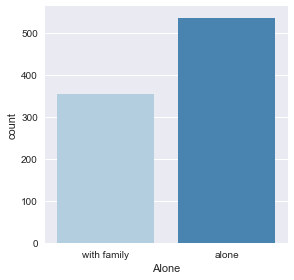

In [37]:
sb.factorplot('Alone',data=titanicdf,kind='count',palette='Blues')

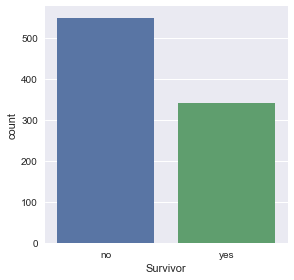

In [43]:
titanicdf['Survivor'] = titanicdf.Survived.map({0:'no',1:'yes'})
sb.factorplot('Survivor',data=titanicdf,kind='count')

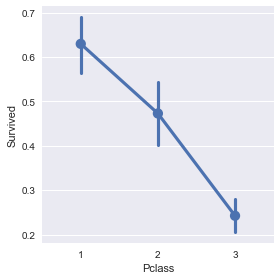

In [48]:
sb.factorplot(x='Pclass',y='Survived',data=titanicdf)

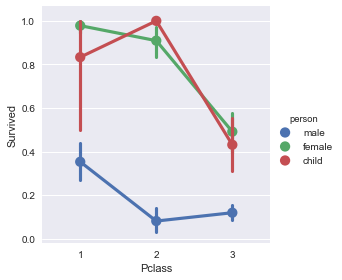

In [55]:
sb.factorplot(x='Pclass',y='Survived',data=titanicdf,hue='person')

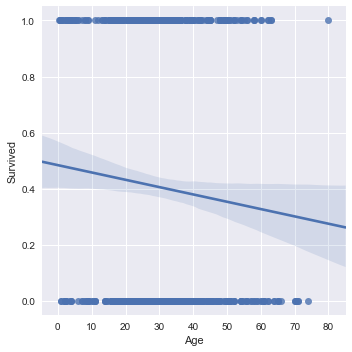

In [56]:
sb.lmplot('Age','Survived',data=titanicdf)

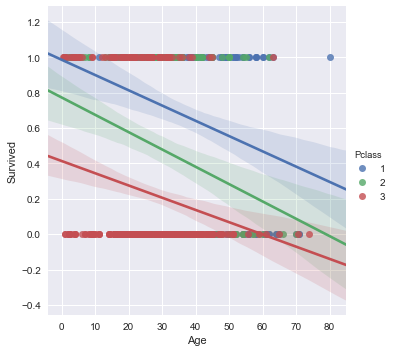

In [57]:
sb.lmplot('Age','Survived',hue='Pclass',data=titanicdf)

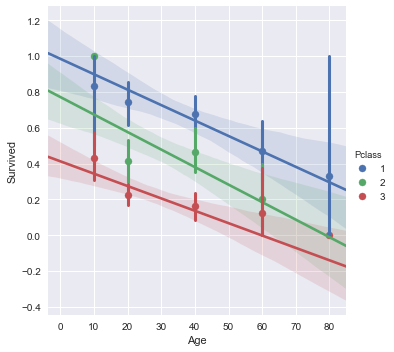

In [58]:
gen = [10,20,40,60,80]
sb.lmplot('Age','Survived',hue='Pclass',data=titanicdf,x_bins=gen)

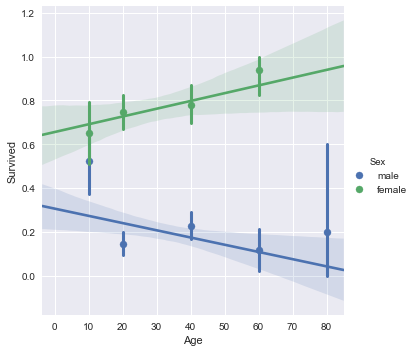

In [59]:
sb.lmplot('Age','Survived',hue='Sex',data=titanicdf,x_bins=gen)

In [65]:
titanicdf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Alone,Survivor,person,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,with family,no,male,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,with family,yes,female,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,alone,yes,female,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,with family,yes,female,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,alone,no,male,n


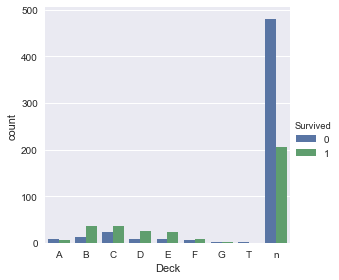

In [70]:
sb.factorplot('Deck', data=titanicdf,kind='count', hue='Survived',order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T','n'])

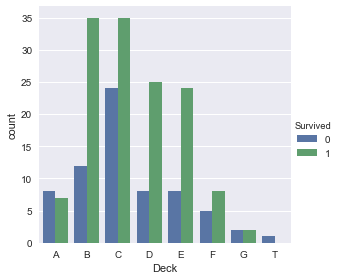

In [71]:
sb.factorplot('Deck', data=titanicdf,kind='count', hue='Survived',order=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'])

In [72]:
#people with no deck had a better chance  to survive.....yeah poor people got lucky

In [73]:
#having a family member increase the odds of surviving the crash?

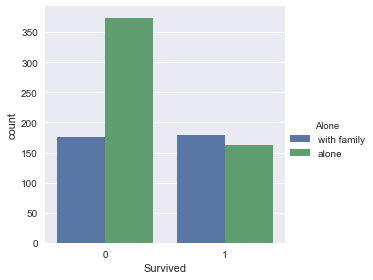

In [75]:
sb.factorplot('Survived', data=titanicdf, hue='Alone',kind='count')

In [76]:
#children and women 1st .....

In [77]:
titanicdf['Alone'].value_counts()

alone          537
with family    354
Name: Alone, dtype: int64